# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.114582e+01     9.521987e+00
 * time: 0.004235982894897461
     1     2.664799e+01     5.373377e+00
 * time: 0.012415885925292969
     2     2.081737e+01     7.334171e+00
 * time: 0.03206801414489746
     3     1.185873e+01     1.951346e+00
 * time: 0.05547499656677246
     4     1.084898e+01     2.406320e+00
 * time: 0.07115507125854492
     5     1.055598e+01     1.141470e+00
 * time: 0.08683300018310547
     6     1.009597e+01     1.132354e+00
 * time: 0.10258102416992188
     7     9.620152e+00     8.703258e-01
 * time: 0.11826491355895996
     8     9.186463e+00     1.050955e+00
 * time: 0.13395404815673828
     9     8.969638e+00     5.836170e-01
 * time: 0.14967107772827148
    10     8.888623e+00     4.198886e-01
 * time: 0.16550493240356445
    11     8.819760e+00     6.051242e-01
 * time: 0.26979589462280273
    12     8.722341e+00     5.245677e-01
 * time: 0.2810859680175781
    13     8.681684e+00     3.144748e-01
 * time

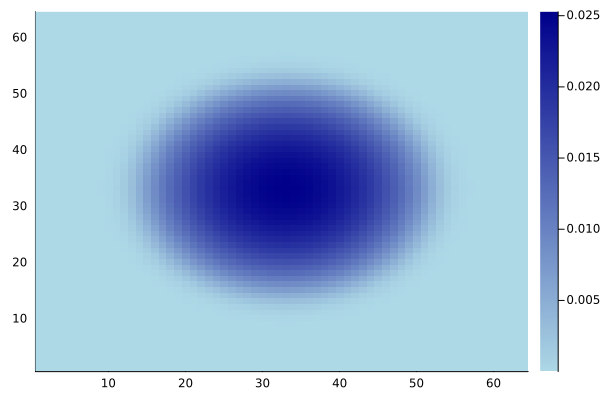

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)